# 6.6: Analysing Time Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Data

### 1. Importing libraries and data

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore")

#plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:

In [186]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [187]:
# Define a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Achievement6'

# import the dataset 
df = pd.read_csv(os.path.join(path,'Project', 'Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'), index_col= False)

In [188]:
print(df.shape)
df.head()

(430560, 13)


,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,09/24/2023,01/01/2020,01/31/2020,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,09/24/2023,02/01/2020,02/29/2020,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,09/24/2023,03/01/2020,03/31/2020,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,09/24/2023,04/01/2020,04/30/2020,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,09/24/2023,05/01/2020,05/31/2020,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


### 2. Subsetting, wrangling, and cleaning time-series data

In [189]:
# create a dataframe subset having Year, Month, COVID-19 Deaths and Number of Mentions
df_sub = df[['Start Date', 'COVID-19 Deaths','Number of Mentions']]
df_sub.head()

,Start Date,COVID-19 Deaths,Number of Mentions
0,01/01/2020,0.0,0.0
1,02/01/2020,0.0,0.0
2,03/01/2020,0.0,0.0
3,04/01/2020,0.0,0.0
4,05/01/2020,0.0,0.0


In [190]:
# Group based on Date and aggragate the sum of values of COVID-19 Deaths and Number of Mentions
df_sub[['Sum_COVID-19 Deaths','Sum_Number of Mentions']] = df_sub.groupby(['Start Date'])[['COVID-19 Deaths','Number of Mentions']].transform(np.sum)
df_sub.head

<bound method NDFrame.head of         Start Date  COVID-19 Deaths  Number of Mentions  Sum_COVID-19 Deaths  \
0       01/01/2020              0.0                 0.0                128.0   
1       02/01/2020              0.0                 0.0                322.0   
2       03/01/2020              0.0                 0.0              31477.0   
3       04/01/2020              0.0                 0.0             232374.0   
4       05/01/2020              0.0                 0.0             143860.0   
...            ...              ...                 ...                  ...   
430555  05/01/2023              7.0                 9.0              22062.0   
430556  06/01/2023              7.0                 3.0              17890.0   
430557  07/01/2023              0.0                 0.0              15853.0   
430558  08/01/2023              7.0                 6.0              22607.0   
430559  09/01/2023              9.0                 9.0              15597.0   

        S

In [191]:
# subsetting again to retain only required columns
df_sub_new = df_sub[['Start Date', 'Sum_COVID-19 Deaths','Sum_Number of Mentions']]

In [192]:
# Rename the column Start Date to Datetime
df_sub_new.rename(columns = {'Start Date' : 'Datetime'}, inplace=True)
df_sub_new.columns

Index(['Datetime', 'Sum_COVID-19 Deaths', 'Sum_Number of Mentions'], dtype='object')

In [193]:
df_sub_new[['Sum_COVID-19 Deaths','Sum_Number of Mentions']] = df_sub_new[['Sum_COVID-19 Deaths','Sum_Number of Mentions']].round(2)
df_sub_new.rename(columns = {'Sum_COVID-19 Deaths' : 'COVID-19 Deaths',
                             'Sum_Number of Mentions' : 'Number of Mentions'
                            }, inplace=True)
df_sub_new.head()

,Datetime,COVID-19 Deaths,Number of Mentions
0,01/01/2020,128.0,107.0
1,02/01/2020,322.0,366.0
2,03/01/2020,31477.0,31885.0
3,04/01/2020,232374.0,243067.0
4,05/01/2020,143860.0,152487.0


In [194]:
# check for duplicates
df_dups = df_sub_new[df_sub_new.duplicated()] 
df_dups

,Datetime,COVID-19 Deaths,Number of Mentions
45,01/01/2020,128.0,107.0
46,02/01/2020,322.0,366.0
47,03/01/2020,31477.0,31885.0
48,04/01/2020,232374.0,243067.0
49,05/01/2020,143860.0,152487.0
...,...,...,...
430555,05/01/2023,22062.0,23654.0
430556,06/01/2023,17890.0,18630.0
430557,07/01/2023,15853.0,17055.0
430558,08/01/2023,22607.0,24280.0


In [195]:
# remove duplicates
df_clean = df_sub_new.drop_duplicates()
df_clean.shape
df_clean.head()

,Datetime,COVID-19 Deaths,Number of Mentions
0,01/01/2020,128.0,107.0
1,02/01/2020,322.0,366.0
2,03/01/2020,31477.0,31885.0
3,04/01/2020,232374.0,243067.0
4,05/01/2020,143860.0,152487.0


##### Subsetting done to include only relevant columns i.e. Start Date, COVID-19 Deaths and Number of Mentions.
##### Grouped the data based on the Start Date and calculated the sum of Death counts and Number of Mentions inorder to get the aggregated value of all the records.
##### Removed duplicated records as same records can be present for varioues countries

In [196]:
# Set the "Datetime" column as the index

df_clean['Datetime'] = pd.to_datetime(df_clean['Datetime']) # Create a datetime column from "Date.""
df_clean = df_clean.set_index('Datetime') # Set the datetime as the index of the dataframe.
df_clean.head()

,COVID-19 Deaths,Number of Mentions
Datetime,,
2020-01-01,128.0,107.0
2020-02-01,322.0,366.0
2020-03-01,31477.0,31885.0
2020-04-01,232374.0,243067.0
2020-05-01,143860.0,152487.0


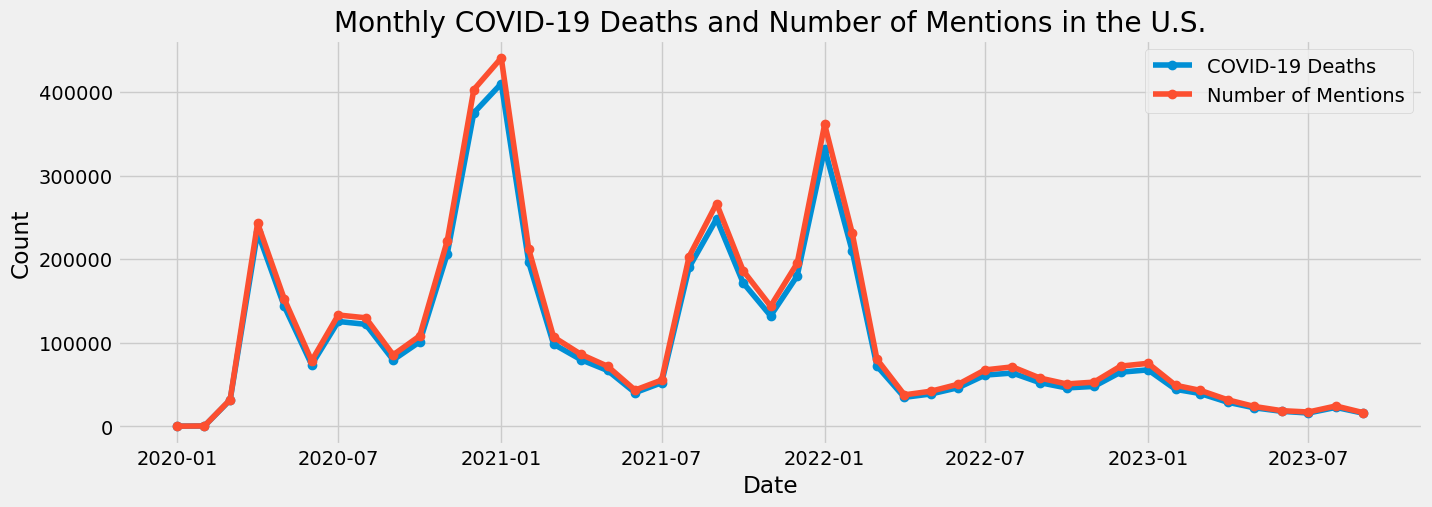

In [197]:
# Plot the new data set

plt.figure(figsize=(15,5))
plt.plot(df_clean, marker = 'o')
plt.title('Monthly COVID-19 Deaths and Number of Mentions in the U.S.')
plt.xlabel('Date')
plt.ylabel('Count')
plt.gca().legend(('COVID-19 Deaths','Number of Mentions'))

plt.show()

### 3. Time series analysis: decomposition

In [212]:
# Decompose the time series using an additive model

#decomposition = sm.tsa.seasonal_decompose(df_clean, model='additive')
df_clean_covid = df_clean[['COVID-19 Deaths']]
df_clean_mentions = df_clean[['Number of Mentions']]

decomposition_covid = sm.tsa.seasonal_decompose(df_clean_covid, model='multiplicative')
decomposition_mention = sm.tsa.seasonal_decompose(df_clean_mentions, model='multiplicative')


In [213]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

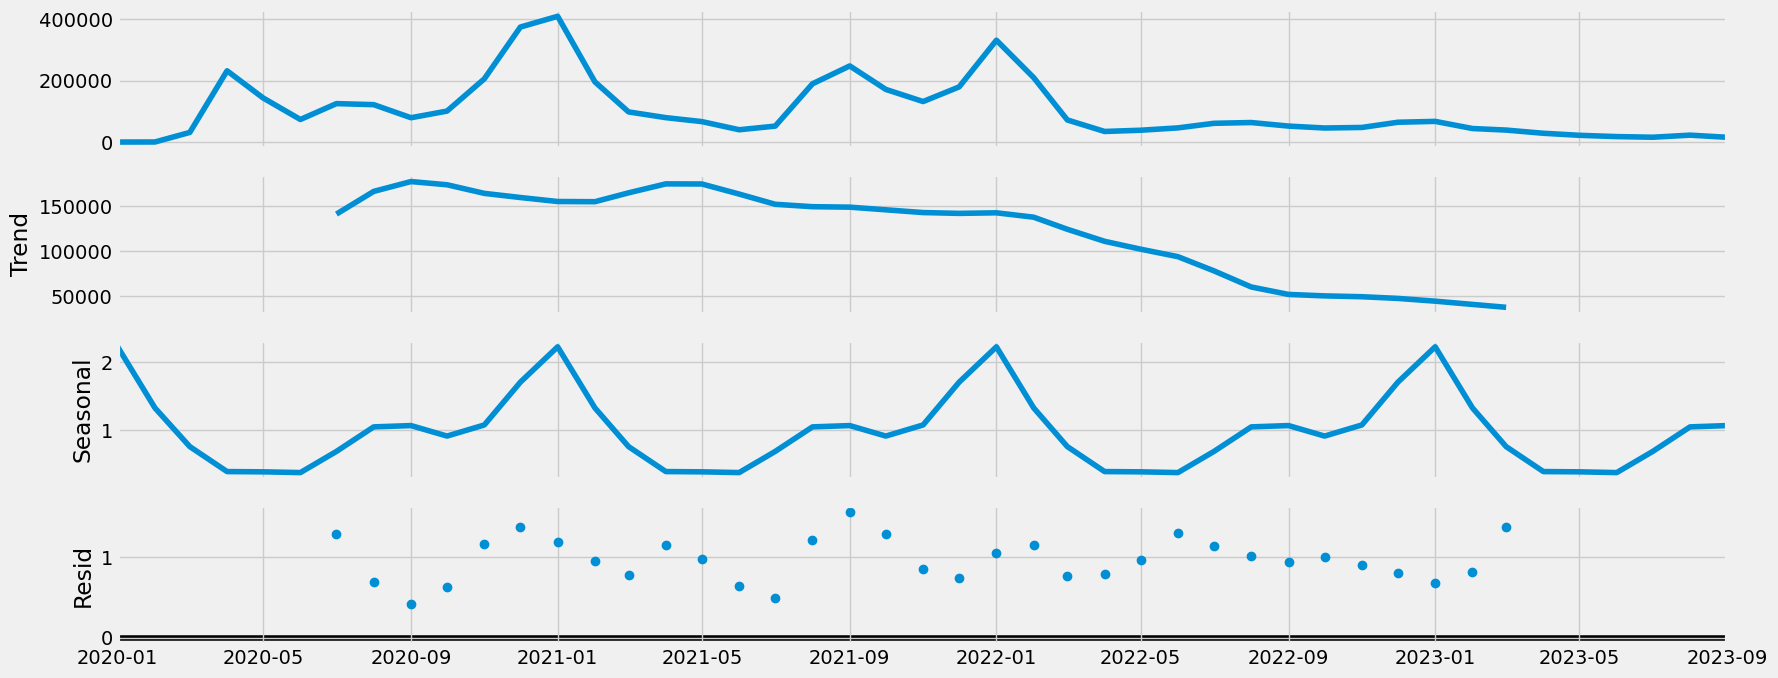

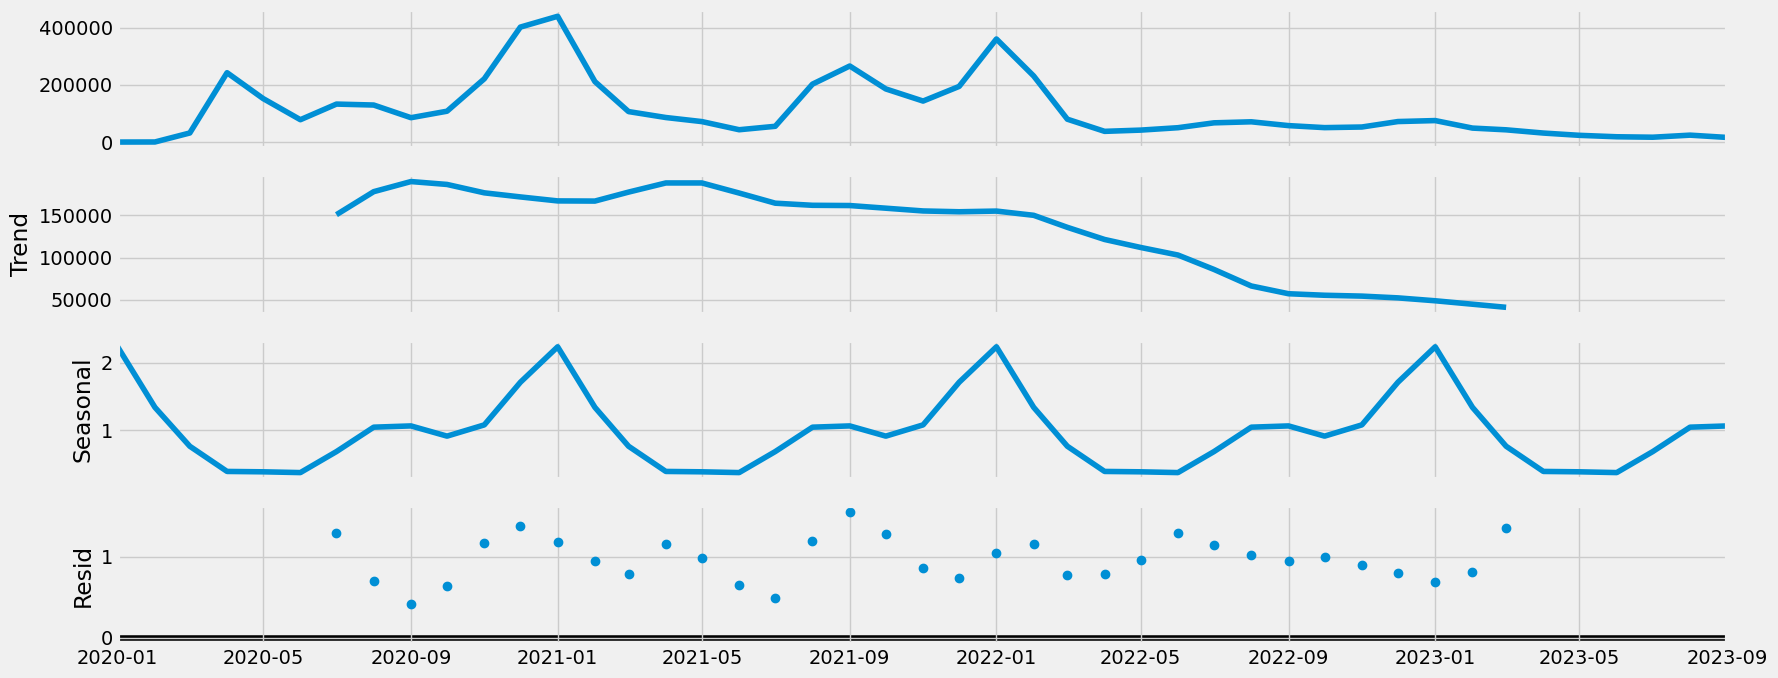

In [214]:
# Plot the separate components

decomposition_covid.plot()
decomposition_mention.plot()
plt.show()

#### Decomposition of COVID-19 Deaths and Number of Mentions:
#### AS per the above diagrams, in both cases there is a downward trend indicating a decrease in the number of mentions and COVID-19 Deaths. Since there are periodic fluctuations in the seasonal graph, indicating seasonality in the data with regular increases during certain intervals. There is significant amont of noises during 2020 and 2021. After that we can see a slight reduction in noise from 2022 onwards.


### 4. Testing for stationarity

In [224]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_clean_covid['COVID-19 Deaths'])
dickey_fuller(df_clean_mentions['Number of Mentions'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.407904
p-value                         0.139518
Number of Lags Used             2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64
Dickey-Fuller Stationarity test:
Test Statistic                 -2.410128
p-value                         0.138898
Number of Lags Used             2.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


#### Null Hypothesis: There is unit root, which means data is non-stationary
#### Alternative Hypothesis: There is no unit root, which means data is stationary
#### Here Test Statistic = -2.4 and Critical value (5%) = -2.9
#### It is clear that the value of Test statistic is higher than the significance level. So null hypothesis can't be rejected. Thereby concluding that the data is non-stationary

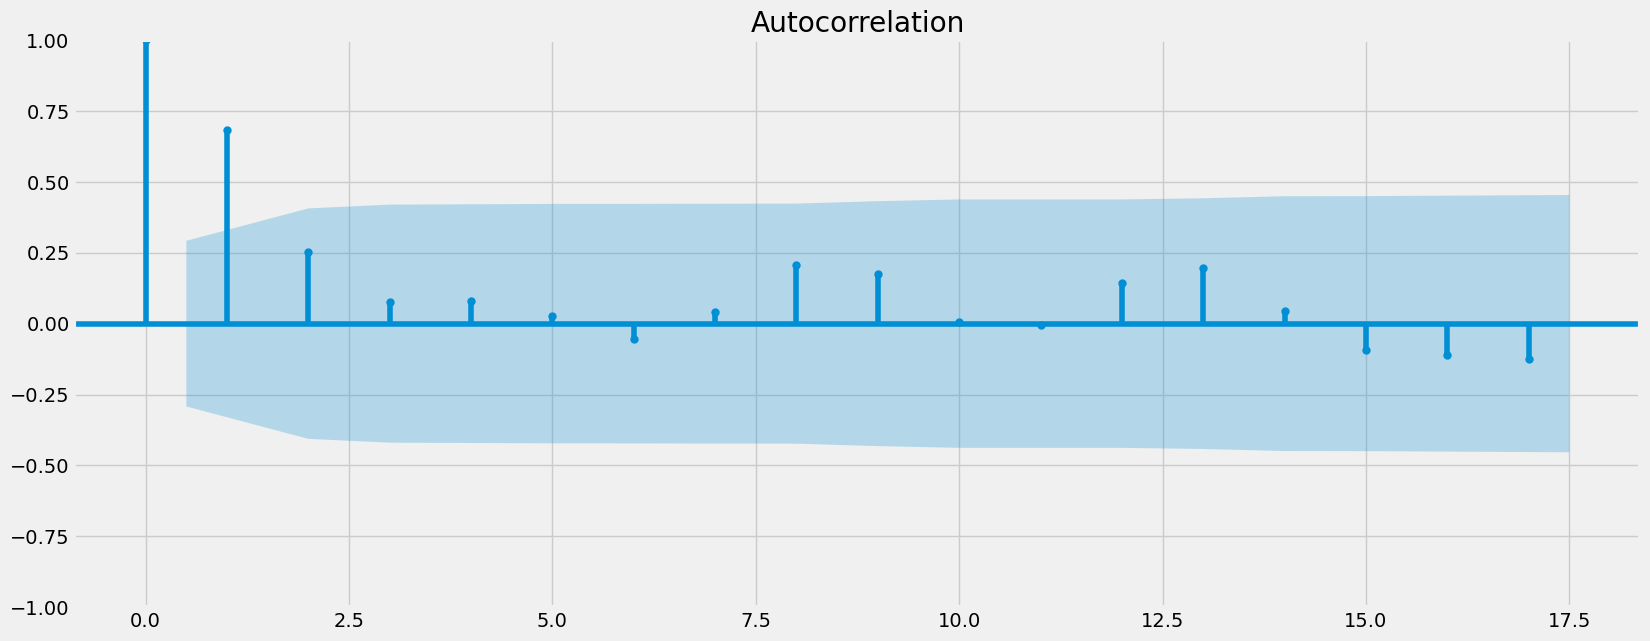

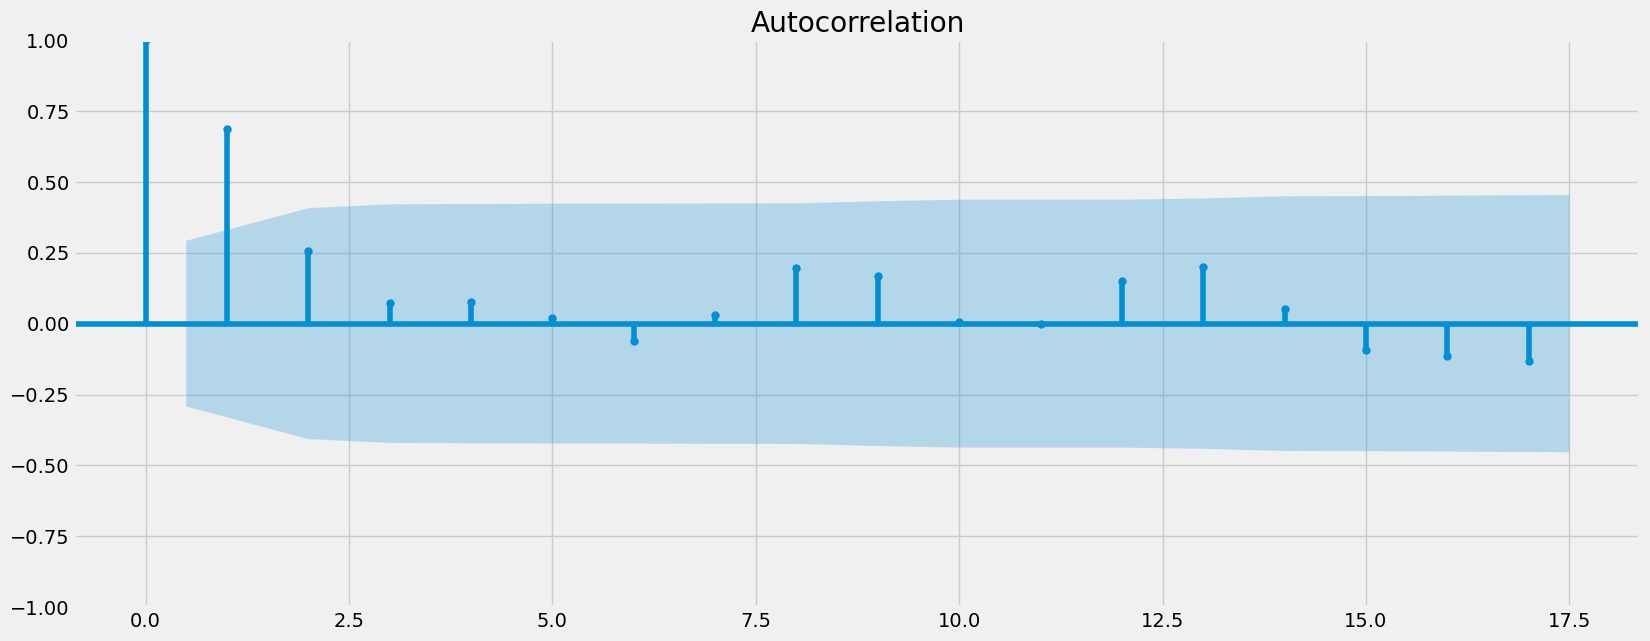

In [225]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_clean_covid)
plot_acf(df_clean_mentions)
plt.show()

#### In the above diagram, we have a very few autocorrelated data.  Only 2 lines go above the blue edge of the confidence interval, this means don't have lags that are significantly correlated with each other.

### 5. Stationarizing the Data

In [226]:
data_diff_covid = df_clean_covid - df_clean_covid.shift(1)
data_diff_mentions = df_clean_mentions - df_clean_mentions.shift(1)# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [227]:
data_diff_covid.dropna(inplace = True)
data_diff_mentions.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [228]:
print(data_diff_covid.head())
print(data_diff_mentions.head())

            COVID-19 Deaths
Datetime                   
2020-02-01            194.0
2020-03-01          31155.0
2020-04-01         200897.0
2020-05-01         -88514.0
2020-06-01         -70173.0
            Number of Mentions
Datetime                      
2020-02-01               259.0
2020-03-01             31519.0
2020-04-01            211182.0
2020-05-01            -90580.0
2020-06-01            -74081.0


In [229]:
print(data_diff_covid.columns)
print(data_diff_mentions.columns)

Index(['COVID-19 Deaths'], dtype='object')
Index(['Number of Mentions'], dtype='object')


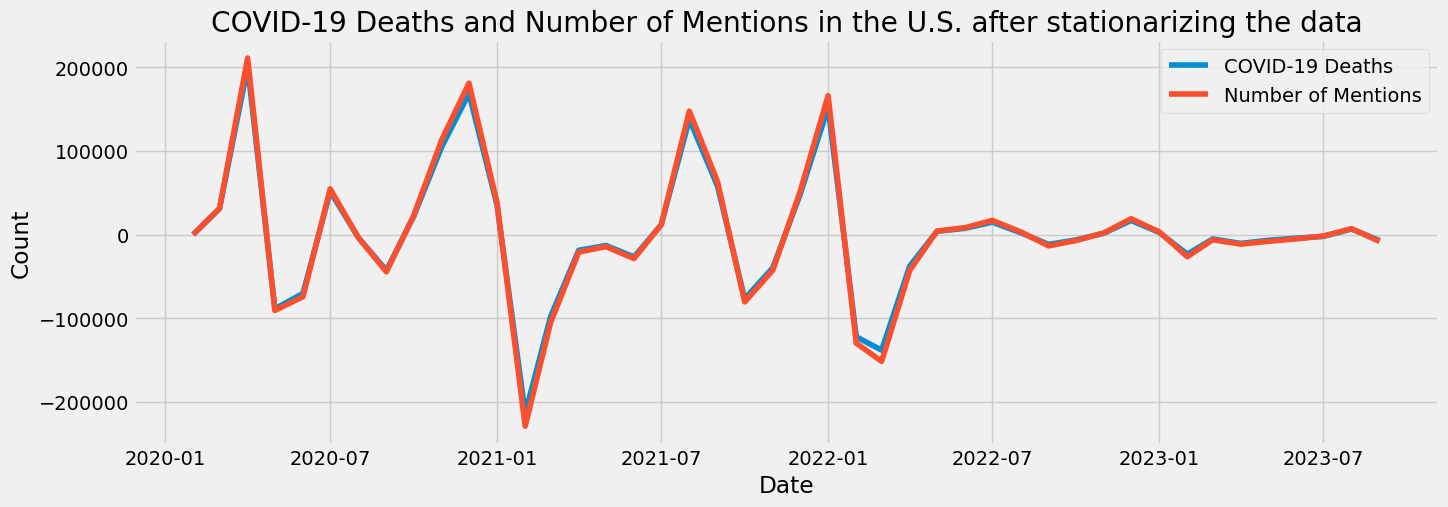

In [231]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_covid)
plt.plot(data_diff_mentions)
plt.title('COVID-19 Deaths and Number of Mentions in the U.S. after stationarizing the data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.gca().legend(('COVID-19 Deaths','Number of Mentions'))

In [232]:
dickey_fuller(data_diff_covid)
dickey_fuller(data_diff_mentions)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.684396
p-value                         0.004338
Number of Lags Used             9.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64
Dickey-Fuller Stationarity test:
Test Statistic                 -3.687525
p-value                         0.004292
Number of Lags Used             9.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


#### After stationarizing the data, again dickey-fuller test has been conducted which leads to following conclusions:
#### Here the Test Statistic is smaller than the significance value, which indicates null hypothesis can be rejected and data is stationary.
#### Also the p-value is 0.004 which is less than 0.05 indicates a significant result.

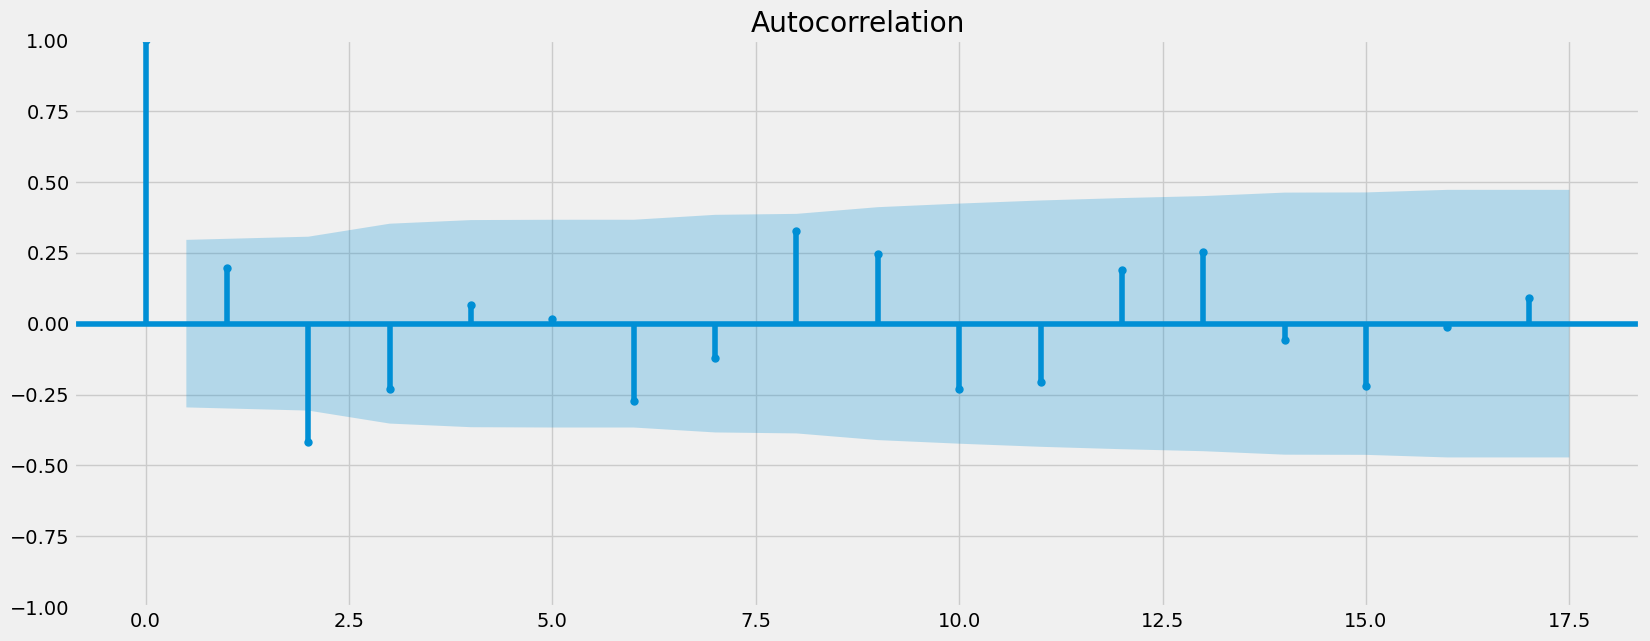

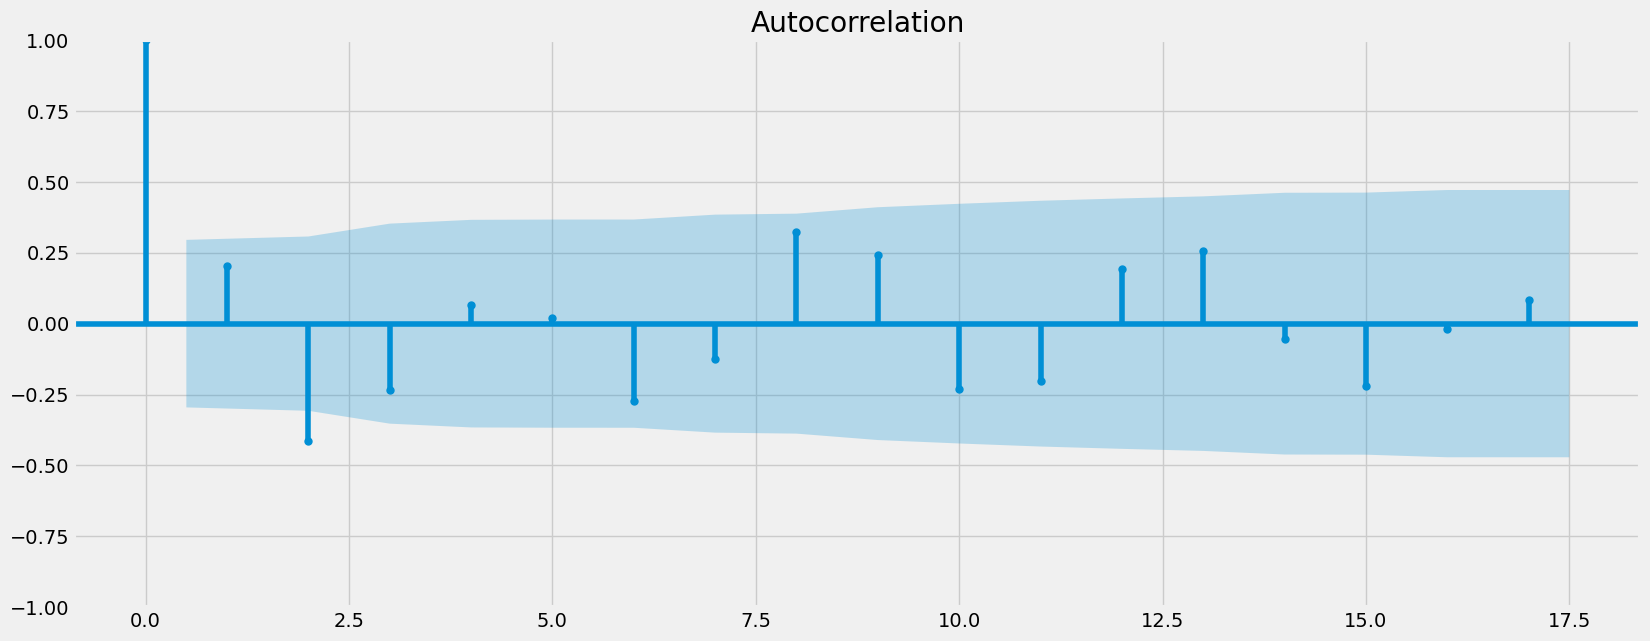

In [233]:
# checking auto coorelation once again
plot_acf(data_diff_covid)
plot_acf(data_diff_mentions)
plt.show()

#### In the above diagram, only 2 lines go beyond the blue edge of the confidence interval, this means there are no lags that are significantly correlated with each other.